In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load your datasets (use the paths from your download)
features_df = pd.read_csv("C:\\Users\\shrey\\.cache\\kagglehub\\datasets\\manjeetsingh\\retaildataset\\versions\\2\\Features data set.csv")
sales_df = pd.read_csv("C:\\Users\\shrey\\.cache\\kagglehub\\datasets\\manjeetsingh\\retaildataset\\versions\\2\\sales data-set.csv")
stores_df = pd.read_csv("C:\\Users\\shrey\\.cache\\kagglehub\\datasets\\manjeetsingh\\retaildataset\\versions\\2\\stores data-set.csv")

In [6]:
# Fix date format
features_df['Date'] = pd.to_datetime(features_df['Date'], dayfirst=True)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], dayfirst=True)

In [7]:
# Handle missing values in MarkDown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features_df[markdown_columns] = features_df[markdown_columns].fillna(0)

print("=== DATA QUALITY CHECK ===")
print("Missing values after cleaning:")
print(features_df.isnull().sum())

print("\n=== DATE RANGE ===")
print(f"Features date range: {features_df['Date'].min()} to {features_df['Date'].max()}")
print(f"Sales date range: {sales_df['Date'].min()} to {sales_df['Date'].max()}")

=== DATA QUALITY CHECK ===
Missing values after cleaning:
Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

=== DATE RANGE ===
Features date range: 2010-02-05 00:00:00 to 2013-07-26 00:00:00
Sales date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


In [8]:
# Merge datasets
merged_df = pd.merge(sales_df, features_df, on=['Store', 'Date'], how='left')
merged_df = pd.merge(merged_df, stores_df, on=['Store'], how='left')

print(f"Merged dataset shape: {merged_df.shape}")
print("\nFirst few rows of merged data:")
print(merged_df.head())

print("\nColumns in merged dataset:")
print(merged_df.columns.tolist())

Merged dataset shape: (421570, 17)

First few rows of merged data:
   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployme

In [9]:
# Basic statistics
print("=== BASIC STATISTICS ===")
print("Weekly Sales Statistics:")
print(merged_df['Weekly_Sales'].describe())

total_sales = merged_df['Weekly_Sales'].sum()
print(f"\n💵 TOTAL SALES: ${total_sales:,.2f}")
print(f"📊 AVERAGE WEEKLY SALES: ${merged_df['Weekly_Sales'].mean():.2f}")
print(f"🏪 NUMBER OF STORES: {merged_df['Store'].nunique()}")
print(f"📦 NUMBER OF DEPARTMENTS: {merged_df['Dept'].nunique()}")
print(f"📅 DATA TIME SPAN: {merged_df['Date'].min()} to {merged_df['Date'].max()}")

=== BASIC STATISTICS ===
Weekly Sales Statistics:
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

💵 TOTAL SALES: $6,737,218,987.11
📊 AVERAGE WEEKLY SALES: $15981.26
🏪 NUMBER OF STORES: 45
📦 NUMBER OF DEPARTMENTS: 81
📅 DATA TIME SPAN: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


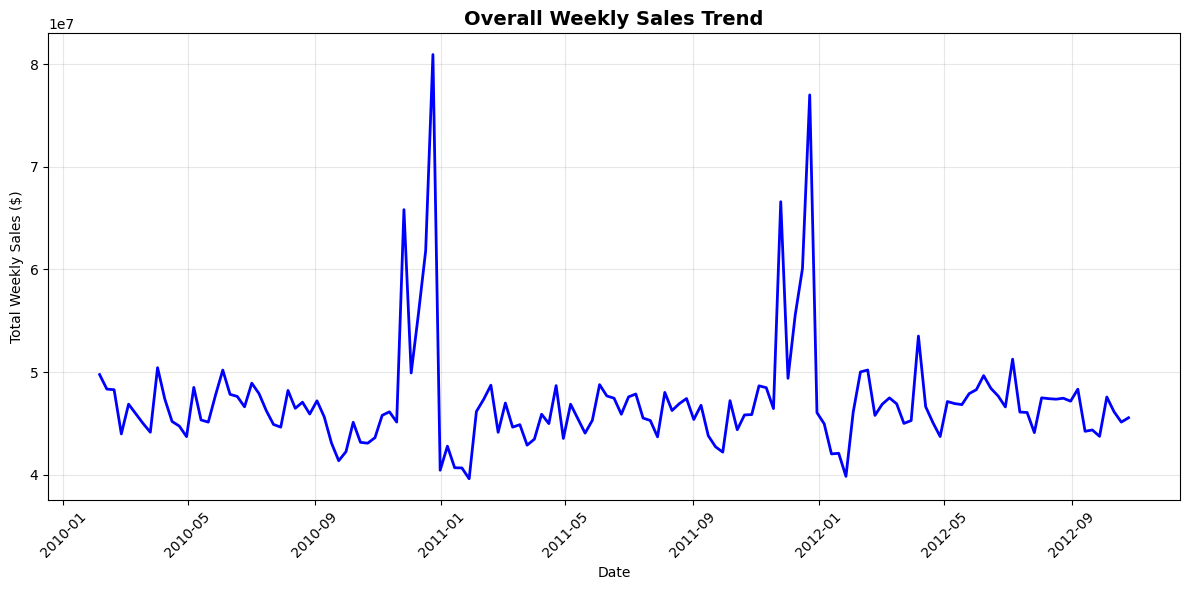

In [10]:
# Plot 1: Overall sales trend
plt.figure(figsize=(12, 6))
weekly_trend = merged_df.groupby('Date')['Weekly_Sales'].sum()
plt.plot(weekly_trend.index, weekly_trend.values, linewidth=2, color='blue')
plt.title('Overall Weekly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales ($)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

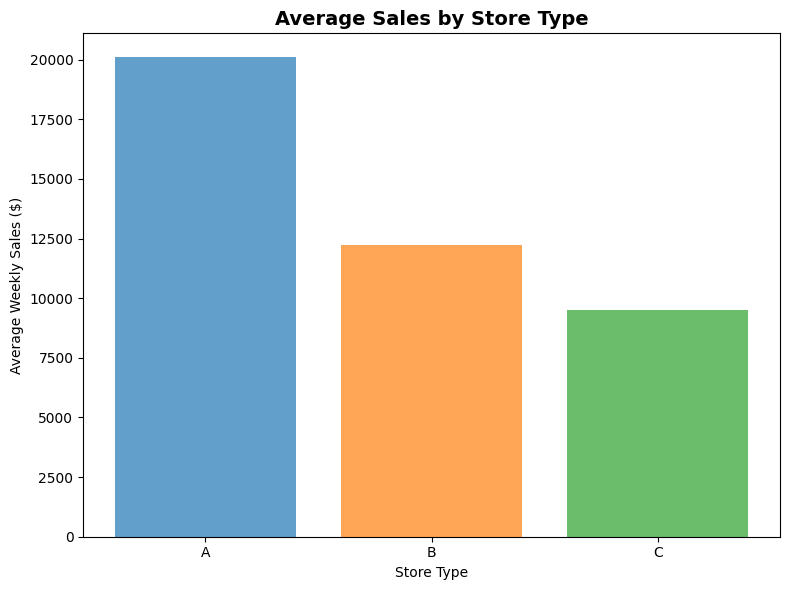

In [12]:
# Cell 8: Store Type Performance
plt.figure(figsize=(8, 6))
store_type_sales = merged_df.groupby('Type')['Weekly_Sales'].mean()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.bar(store_type_sales.index, store_type_sales.values, color=colors, alpha=0.7)
plt.title('Average Sales by Store Type', fontsize=14, fontweight='bold')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales ($)')
plt.tight_layout()
plt.show()

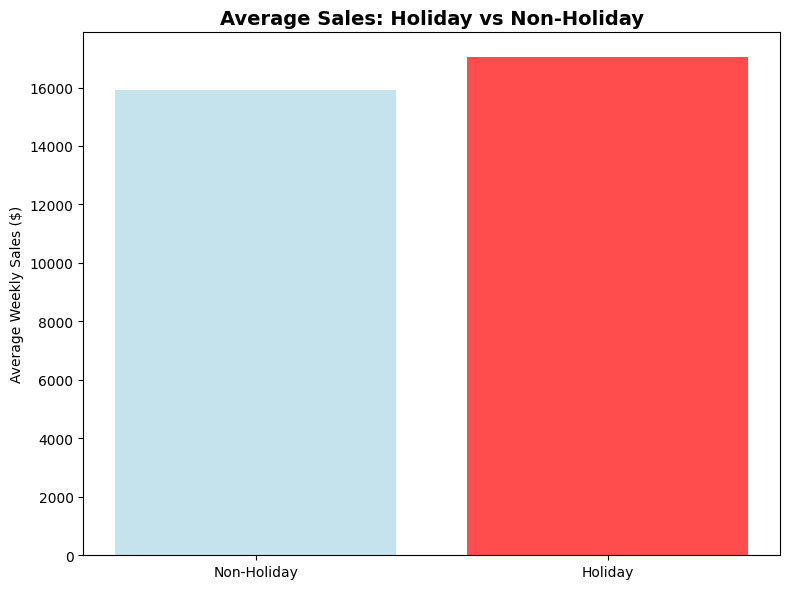

In [13]:
# Cell 9: Holiday Impact
plt.figure(figsize=(8, 6))
holiday_sales = merged_df.groupby('IsHoliday_x')['Weekly_Sales'].mean()
plt.bar(['Non-Holiday', 'Holiday'], holiday_sales.values, color=['lightblue', 'red'], alpha=0.7)
plt.title('Average Sales: Holiday vs Non-Holiday', fontsize=14, fontweight='bold')
plt.ylabel('Average Weekly Sales ($)')
plt.tight_layout()
plt.show()

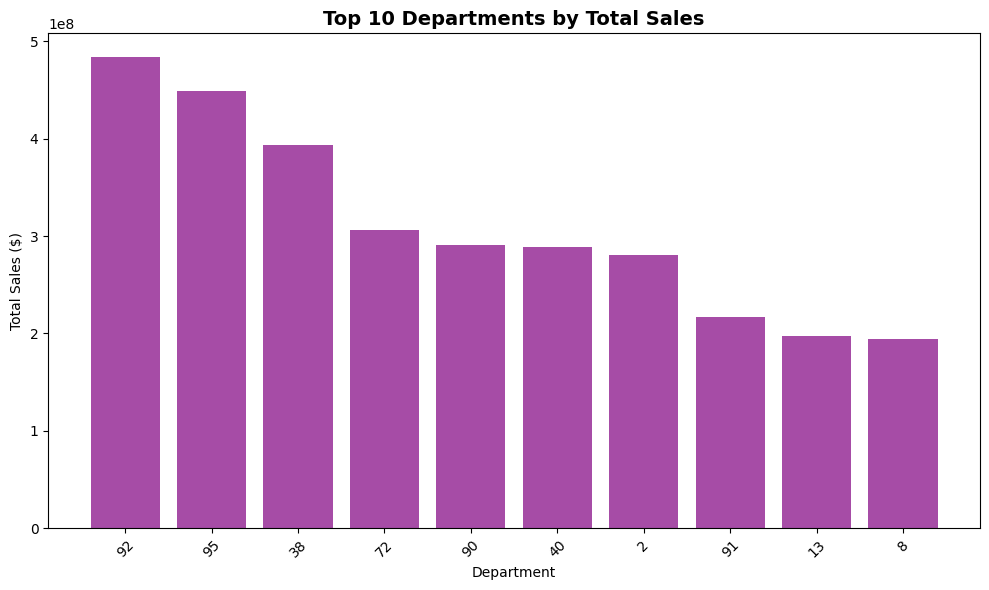

In [14]:
# Cell 10: Top Departments
plt.figure(figsize=(10, 6))
dept_performance = merged_df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
plt.bar(range(len(dept_performance)), dept_performance.values, color='purple', alpha=0.7)
plt.title('Top 10 Departments by Total Sales', fontsize=14, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Total Sales ($)')
plt.xticks(range(len(dept_performance)), dept_performance.index, rotation=45)
plt.tight_layout()
plt.show()

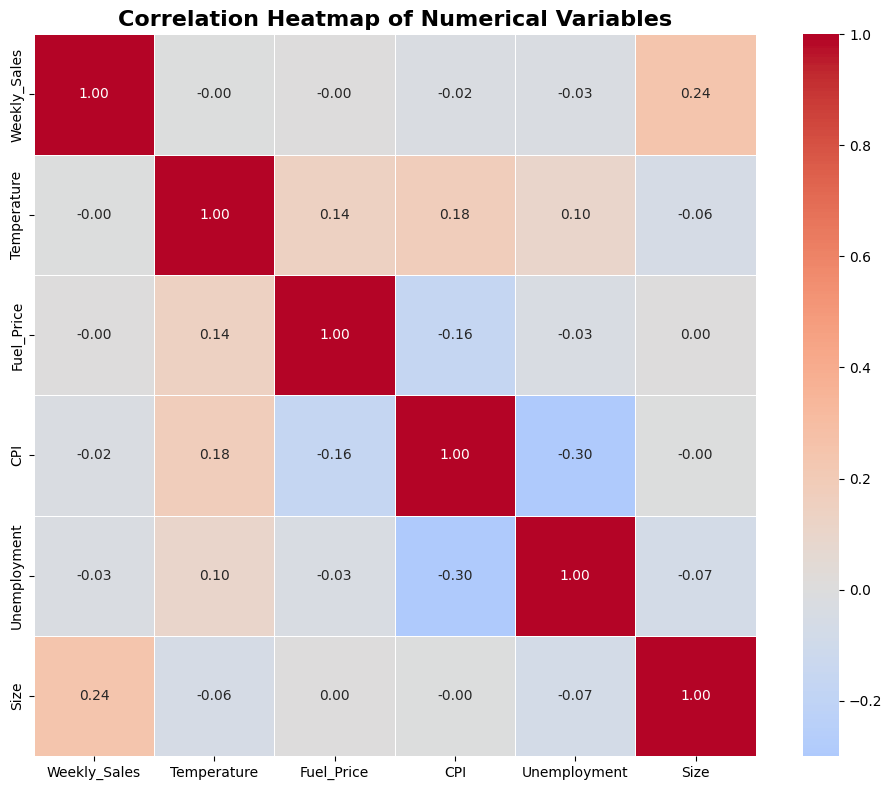

In [15]:
# Cell 11: Correlation Heatmap
plt.figure(figsize=(10, 8))
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']
numerical_df = merged_df[numerical_cols].corr()

sns.heatmap(numerical_df, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# Cell 12: Generate Key Insights & Business Recommendations
print("="*70)
print("📊 KEY INSIGHTS & BUSINESS RECOMMENDATIONS")
print("="*70)

# Insight 1: Best performing store type
best_store_type = merged_df.groupby('Type')['Weekly_Sales'].mean().idxmax()
best_store_sales = merged_df.groupby('Type')['Weekly_Sales'].mean().max()
print(f"1. 🏪 Store Type '{best_store_type}' has the highest average sales (${best_store_sales:,.2f})")
print("   → 💡 Recommendation: Focus expansion on this store type and analyze what makes it successful")

# Insight 2: Holiday impact
holiday_avg = merged_df[merged_df['IsHoliday_x'] == True]['Weekly_Sales'].mean()
non_holiday_avg = merged_df[merged_df['IsHoliday_x'] == False]['Weekly_Sales'].mean()
holiday_multiplier = (holiday_avg / non_holiday_avg) - 1
print(f"2. 🎉 Holidays boost sales by {holiday_multiplier:.1%} (${holiday_avg:,.2f} vs ${non_holiday_avg:,.2f})")
print("   → 💡 Recommendation: Plan special promotions, increase staffing, and stock up before holidays")

# Insight 3: Seasonal patterns
merged_df['Month'] = merged_df['Date'].dt.month
monthly_avg = merged_df.groupby('Month')['Weekly_Sales'].mean()
best_month = monthly_avg.idxmax()
worst_month = monthly_avg.idxmin()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(f"3. 📅 Best month: {months[best_month-1]} (${monthly_avg[best_month]:,.2f}), Worst month: {months[worst_month-1]} (${monthly_avg[worst_month]:,.2f})")
print("   → 💡 Recommendation: Allocate marketing budget strategically throughout the year")

# Insight 4: Store size correlation
size_corr = merged_df['Size'].corr(merged_df['Weekly_Sales'])
print(f"4. 📏 Store size has a correlation of {size_corr:.2f} with weekly sales")
if size_corr > 0.3:
    print("   → 💡 Recommendation: Larger stores perform better - consider size when planning new locations")
else:
    print("   → 💡 Recommendation: Store size isn't the main factor - focus on other operational aspects")

# Insight 5: Top departments
dept_performance = merged_df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)
top_dept = dept_performance.index[0]
top_dept_sales = dept_performance.iloc[0]
print(f"5. 📦 Department {top_dept} is the top performer with ${top_dept_sales:,.2f} in total sales")
print("   → 💡 Recommendation: Ensure adequate inventory and prominent placement for top departments")

# Insight 6: Overall performance metrics
total_sales = merged_df['Weekly_Sales'].sum()
avg_weekly_sales = merged_df['Weekly_Sales'].mean()
print(f"6. 💰 Total Sales: ${total_sales:,.2f} | Average Weekly: ${avg_weekly_sales:,.2f}")
print("   → 💡 Recommendation: Monitor these KPIs regularly to track business health")

print("\n" + "="*70)
print("🎯 EXECUTIVE SUMMARY")
print("="*70)
print("• Optimize store type strategy based on performance data")
print("• Leverage holiday seasons with targeted promotions") 
print("• Plan inventory and marketing around seasonal patterns")
print("• Focus resources on high-performing departments")
print("• Use data-driven insights for expansion decisions")
print("="*70)

📊 KEY INSIGHTS & BUSINESS RECOMMENDATIONS
1. 🏪 Store Type 'A' has the highest average sales ($20,099.57)
   → 💡 Recommendation: Focus expansion on this store type and analyze what makes it successful
2. 🎉 Holidays boost sales by 7.1% ($17,035.82 vs $15,901.45)
   → 💡 Recommendation: Plan special promotions, increase staffing, and stock up before holidays
3. 📅 Best month: Dec ($19,355.70), Worst month: Jan ($14,126.08)
   → 💡 Recommendation: Allocate marketing budget strategically throughout the year
4. 📏 Store size has a correlation of 0.24 with weekly sales
   → 💡 Recommendation: Store size isn't the main factor - focus on other operational aspects
5. 📦 Department 92 is the top performer with $483,943,341.87 in total sales
   → 💡 Recommendation: Ensure adequate inventory and prominent placement for top departments
6. 💰 Total Sales: $6,737,218,987.11 | Average Weekly: $15,981.26
   → 💡 Recommendation: Monitor these KPIs regularly to track business health

🎯 EXECUTIVE SUMMARY
• Optimize